 ## 1. Project Overview

### 1.1 Business Understanding

##### 1.1.1 Objective
- The goal is to predict whether a customer will "soon" stop doing business with SyriaTel, a telecommunications company, in order to reduce revenue loss due to customer churn.
  
- This is a binary classification problem where the target variable is "churn" is True for customers who leave, False for those who stay.
  
##### 1.1.2 Business Context
- Customer churn is a critical issue for telecom companies like SyriaTel, as retaining existing customers is often more cost-effective than acquiring new ones. 
  
- Losing customers leads to lost revenue, reduced market share, and increased costs for marketing and customer acquisition. 
  
- By identifying customers at risk of churning, SyriaTel can implement targeted retention strategies, such as offering discounts, personalized plans, or improved customer service, to keep these customers.

##### 1.1.3 Stakeholders
The primary audience is SyriaTel’s management and customer service team, who are interested in:
- Reducing financial losses caused by customer's churn.
- Understanding patterns that would likely indicate a customer is likely to leave.
- Prioritizing resources for retention efforts based on predictive insights.

##### 1.1.4 Key Business Questions
- Are there specific customer behaviors or account characteristics that predict churn?
- Can we build a reliable model to identify at-risk customers early enough to intervene?
- Which factors are most influential in driving churn, and how can the business address them?

##### 1.1.5 Success Metrics 
From a business perspective, success will be measured by:
- The ability to accurately predict churn **(Recall)**, enabling proactive retention efforts.
- Reduction in churn rate after implementing strategies based on model insights.
- Cost savings from retaining customers compared to acquiring new ones.

##### 1.1.5 Expected Outcomes
By leveraging predictive modeling (using Logistic Regression and Decision Tree classifiers), SyriaTel can:
- Identify key predictors of churn (e.g., high customer service calls, expensive plans).
- Develop targeted retention programs to reduce churn rates.
- Optimize resource allocation by focusing on high-risk customers.

### 2. Data Understanding

##### 2.1 Objective
- Here we explore the dataset to understand its structure, content, and quality to assess its suitability for predicting customer churn for SyriaTel.

##### 2.2 Data Source:

- The dataset is sourced from: https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset/data.



##### 2.3 Import Relevant Libraries and Load Dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, r2_score, recall_score, precision_score, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
churn_data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
churn_data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
churn_data.shape

(3333, 21)

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

##### 2.4 Dataset Overview

- **Size**: The dataset contains 3,333 rows (customers) and 21 columns (features, including the target variable).
  
- **Target Variable**: `churn` which is `True` for customers who left, `False` for those who stayed.
  
- **Features**: The dataset includes a mix of numerical and categorical features related to customer demographics, account details, usage patterns, and interactions with customer service.

##### Feature Descriptions
The dataset includes the following columns, along with their data types and descriptions:

| **Feature**                  | **Data Type** | **Description**                                                                 |
|------------------------------|---------------|---------------------------------------------------------------------------------|
| `state`                      | Categorical   | U.S. state where the customer resides.                           |
| `account length`             | Numerical     | Number of days the customer has been with SyriaTel.                             |
| `area code`                  | Categorical   | Area code of the customer’s phone number.                      |
| `phone number`               | Categorical   | Customer’s phone number (unique identifier).                                    |
| `international plan`         | Categorical   | Whether the customer has an international plan (`yes`/`no`).                    |
| `voice mail plan`            | Categorical   | Whether the customer has a voice mail plan (`yes`/`no`).                        |
| `number vmail messages`      | Numerical     | Number of voice mail messages.                                                 |
| `total day minutes`          | Numerical     | Total minutes of calls during the day.                                          |
| `total day calls`            | Numerical     | Total number of calls during the day.                                          |
| `total day charge`           | Numerical     | Total charges for daytime calls.                                               |
| `total eve minutes`          | Numerical     | Total minutes of calls during the evening.                                      |
| `total eve calls`            | Numerical     | Total number of calls during the evening.                                      |
| `total eve charge`           | Numerical     | Total charges for evening calls.                                               |
| `total night minutes`        | Numerical     | Total minutes of calls during the night.                                       |
| `total night calls`          | Numerical     | Total number of calls during the night.                                        |
| `total night charge`         | Numerical     | Total charges for nighttime calls.                                             |
| `total intl minutes`         | Numerical     | Total minutes of international calls.                                          |
| `total intl calls`           | Numerical     | Total number of international calls.                                           |
| `total intl charge`          | Numerical     | Total charges for international calls.                                         |
| `customer service calls`      | Numerical     | Number of calls made to customer service.                                      |
| `churn`                      | Binary        | Target variable indicating whether the customer churned (`True`/`False`).       |


## 3. Data Preparation
##### 3.1 Objective
- Prepare the dataset for modeling by cleaning, transforming, and structuring the data to ensure it is suitable for training **Logistic Regression** and **Decision Tree** classifiers to predict customer churn for SyriaTel. 
  
- The goal is to address issues identified in the **Data Understanding** phase, such as categorical variables, potential missing values, irrelevant features, multicollinearity, and class imbalance, while ensuring the data is in a format compatible with both models.


##### 3.2 Handle Missing Values
   - Check for missing values in all columns.

In [8]:
# Check for null values
churn_data.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

##### 3.3 Drop Irrelevant Features:
   - Remove `phone number` as it has no predictive value for this scenario.
  
   - Drop `state` due to high cardinality and likely low impact on churn.


In [9]:
# Drop the 'state' and 'phone number' columns
# as they are not useful for the analysis
churn_data_df = churn_data.drop(['state', 'phone number'], axis=1)

##### 3.4 Encode Categorical Variables
   - Convert categorical features (`international plan`, `voice mail plan`, `area code`) into numerical format.

   - Use **Label Encoding** for binary categorical variables (`international plan`, `voice mail plan`) and the target (`churn`).

In [10]:
# Encode categorical variables
le = LabelEncoder()
churn_data_df['international plan'] = le.fit_transform(churn_data_df['international plan'])  # yes=1, no=0
churn_data_df['voice mail plan'] = le.fit_transform(churn_data_df['voice mail plan'])  # yes=1, no=0
churn_data_df['churn'] = le.fit_transform(churn_data_df['churn'])  # True=1, False=0

# One-hot encode area code
churn_data_df = pd.get_dummies(churn_data_df, columns=['area code'], prefix='area_code')



In [11]:
churn_data_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,91,11.01,10.0,3,2.70,1,0,False,True,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,103,11.45,13.7,3,3.70,1,0,False,True,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,104,7.32,12.2,5,3.29,0,0,False,True,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,89,8.86,6.6,7,1.78,2,0,True,False,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,121,8.41,10.1,3,2.73,3,0,False,True,False


##### 3.5 Handle Multicollinearity
   - Features like `total day minutes` and `total day charge` are likely highly correlated as charges are derived from minutes. 
  
   - To avoid multicollinearity in Logistic Regression, we can drop charge-related features (`total day charge`, `total eve charge`, `total night charge`, `total intl charge`) and keep minutes, as they capture similar information.

In [12]:
# Handle multicollinearity by dropping charge-related features
churn_data_df = churn_data_df.drop(['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1)

In [13]:
churn_data_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,area_code_408,area_code_415,area_code_510
0,128,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,False,True,False
1,107,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,False,True,False
2,137,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,False,True,False
3,84,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,True,False,False
4,75,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,False,True,False


In [14]:
churn_data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

##### 3.6 Split the Dataset
   - Split the data into training (80%) and testing (20%) sets, using stratification to maintain the churn class distribution.

In [15]:
# Split the data into training (80%) and testing (20%) sets, using stratification to maintain the churn class distribution.
X = churn_data_df.drop('churn', axis=1)
y = churn_data_df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### 3.7 Feature Scaling

In [16]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Modeling

- We build and train two classifiers, **Logistic Regression** and **Decision Tree**, to predict customer churn for SyriaTel. 
  
- The goal is to create models that accurately identify customers at risk of churning, enabling targeted retention strategies. 

- We will train the models, tune their hyperparameters, and prepare them for evaluation in the next phase.

##### 4.1. Model Selection
   - **Logistic Regression**: A linear model suitable for binary classification, interpretable via feature coefficients, and effective when relationships between features and the target are approximately linear. It requires scaled features, which we prepared.
  
   - **Decision Tree**: A non-linear model that captures complex relationships and interactions between features. It is scale-invariant and provides feature importance rankings, useful for identifying key churn predictors.

##### 4.2. Hyperparameter Tuning
   - For **Logistic Regression**, we will adjust the regularization parameter (`C`) to control model complexity and prevent overfitting.
   - For **Decision Tree**, we will tune `max_depth` and `min_samples_split` to balance model complexity and generalization, avoiding overfitting.

##### 4.3 Handling Class Imbalance
   - The dataset may have an imbalanced `churn` variable (e.g., ~15% True, ~85% False, based on typical telecom datasets). We will use class weights (`class_weight='balanced'`) in both models to give more importance to the minority class (churners) during training.



In [ ]:
# Define models and hyperparameter grids
# Logistic Regression
log_reg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
# Hyperparameter grid for Logistic Regression
# Note: The 'C' parameter is the inverse of regularization strength; smaller values specify stronger regularization.
log_reg_param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Decision Tree
dec_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dec_tree_param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

##### 4.4 Training
   - Train both models on the scaled training set (`X_train_scaled`, `y_train`) from the **Data Preparation** phase.
   - Use cross-validation to assess model stability and select optimal hyperparameters.

In [ ]:
# Perform Grid Search with Cross-Validation
# Logistic Regression
# we use GridSearchCV to find the best hyperparameters for Logistic Regression and tuning the model
log_reg_grid = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
log_reg_grid.fit(X_train_scaled, y_train)
best_log_reg = log_reg_grid.best_estimator_
print("Best Logistic Regression Parameters:", log_reg_grid.best_params_)
print("Best Logistic Regression ROC-AUC:", log_reg_grid.best_score_)

# Decision Tree (using the original features)
dec_tree_grid = GridSearchCV(dec_tree, dec_tree_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
dec_tree_grid.fit(X_train, y_train)
best_dec_tree = dec_tree_grid.best_estimator_
print("Best Decision Tree Parameters:", dec_tree_grid.best_params_)
print("Best Decision Tree ROC-AUC:", dec_tree_grid.best_score_)

Best Logistic Regression Parameters: {'C': 1}
Best Logistic Regression ROC-AUC: 0.817495004995005
Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_split': 10}
Best Decision Tree ROC-AUC: 0.8744991485123064


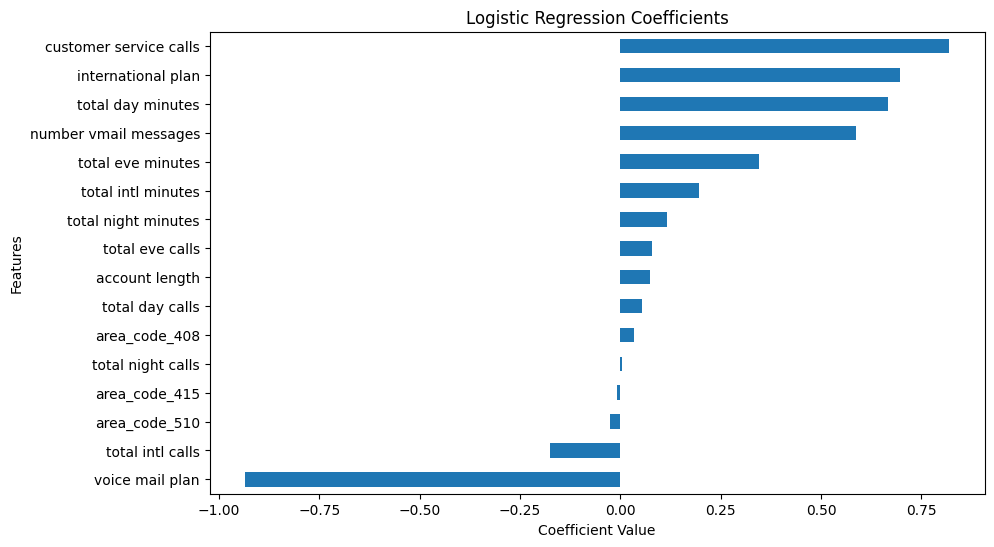

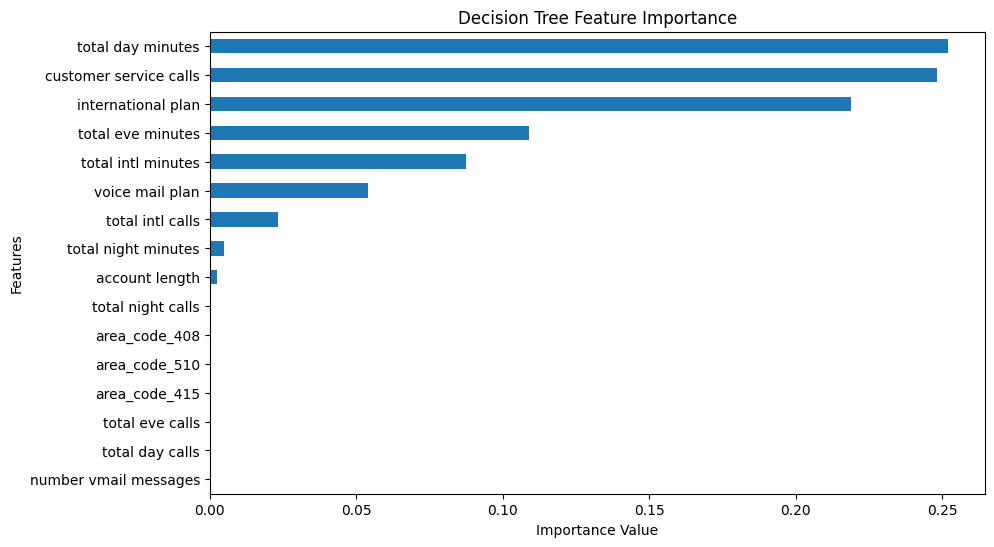

In [ ]:
#Visualize Feature Importance/Coefficients
# Logistic Regression Coefficients
plt.figure(figsize=(10, 6))
coef = pd.Series(best_log_reg.coef_[0], index=X.columns).sort_values()
coef.plot(kind='barh')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()

# Decision Tree Feature Importance
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(best_dec_tree.feature_importances_, index=X.columns).sort_values()
feature_importance.plot(kind='barh')
plt.title('Decision Tree Feature Importance')
plt.xlabel('Importance Value')
plt.ylabel('Features')
plt.show()

In [20]:
# Make predictions on the test set using the best models
y_pred_log_reg = best_log_reg.predict(X_test_scaled)
y_pred_dec_tree = best_dec_tree.predict(X_test)

## 5. Model Evaluation

##### 5.1 Logistic Regression

In [22]:
# Calculate and print evaluation metrics for Logistic Regression
print("Logistic Regression Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("R2 Score:", r2_score(y_test, y_pred_log_reg))
print("Recall:", recall_score(y_test, y_pred_log_reg))
print("Precision:", precision_score(y_test, y_pred_log_reg))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_log_reg))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_log_reg))
print("ROC AUC:", roc_auc_score(y_test, y_pred_log_reg))
print("F1 Score:", f1_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Evaluation Metrics:
Accuracy: 0.760119940029985
R2 Score: -0.930186290468439
Recall: 0.7319587628865979
Precision: 0.3463414634146341
Mean Absolute Error: 0.239880059970015
Mean Squared Error: 0.239880059970015
ROC AUC: 0.748435521794176
F1 Score: 0.47019867549668876
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.76      0.84       570
           1       0.35      0.73      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667

Confusion Matrix:
 [[436 134]
 [ 26  71]]


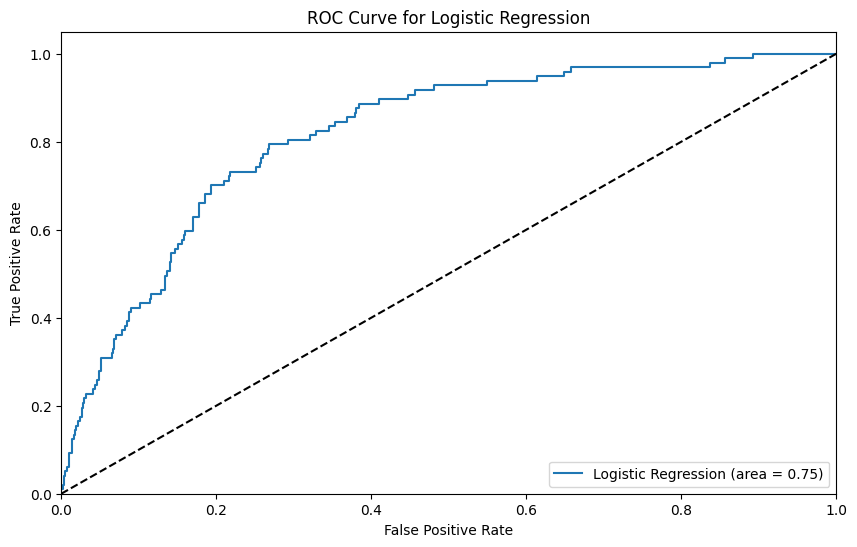

In [50]:
# Logistic Regression ROC Curve
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, best_log_reg.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_log_reg)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# from the above code, we get an accuracy of 0.76 and a ROC AUC of 0.74 for Logistic Regression


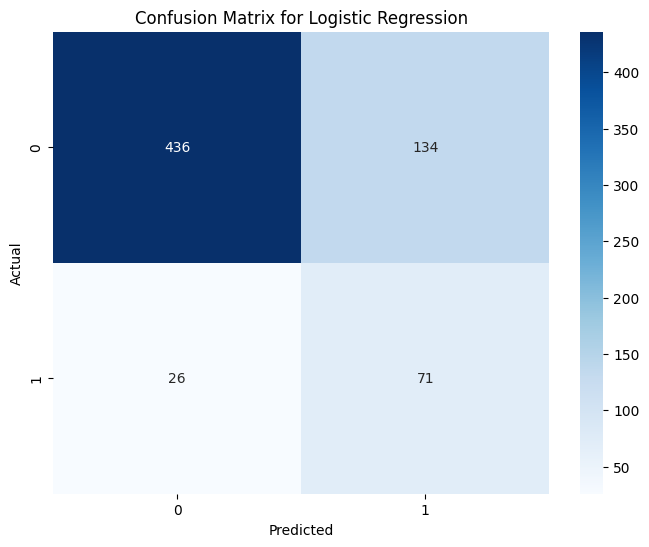

In [49]:
# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Explaining the confusion matrix
- **True Negatives (TN) = 436**: The number of customers correctly predicted as non-churners (actual: non-churn, predicted: non-churn).
- **False Positives (FP) = 134**: The number of customers incorrectly predicted as churners (actual: non-churn, predicted: churn).
- **False Negatives (FN) = 26**: The number of customers incorrectly predicted as non-churners (actual: churn, predicted: non-churn).
- **True Positives (TP) = 71**: The number of customers correctly predicted as churners (actual: churn, predicted: churn).


### Strengths
- **Recall (73.20%)**: The model identifies 73.20% of actual churners (71 out of 97), which is critical for SyriaTel’s goal of catching at-risk customers. This ensures that most customers who are likely to leave are flagged for retention efforts, such as personalized offers or improved customer service.
- **Accuracy (76.01%)**: The model correctly predicts most cases, though accuracy is less informative due to class imbalance (many non-churners are correctly predicted, inflating accuracy).

#### Weaknesses
- **Precision (34.63%)**: Only about one-third of customers predicted to churn actually do. The high false positive rate (134 customers incorrectly flagged as churners) means SyriaTel may waste resources  on customers who would have stayed.
- **F1-Score (47.02%)**: The trade-off between precision and recall results in a moderate F1-score.


##### 5.2 Decision Tree

In [47]:

# Calculate and print evaluation metrics for Decision Tree
print("Decision Tree Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dec_tree))
print("R2 Score:", r2_score(y_test, y_pred_dec_tree))
print("Recall:", recall_score(y_test, y_pred_dec_tree))
print("Precision:", precision_score(y_test, y_pred_dec_tree))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dec_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dec_tree))

# Print evaluation metrics
print("ROC AUC:", roc_auc_score(y_test, y_pred_dec_tree))
print("F1 Score:", f1_score(y_test, y_pred_dec_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_dec_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dec_tree))

Decision Tree Evaluation Metrics:
Accuracy: 0.904047976011994
R2 Score: 0.22792548381262434
Recall: 0.7319587628865979
Precision: 0.6513761467889908
Mean Absolute Error: 0.095952023988006
Mean Squared Error: 0.095952023988006
ROC AUC: 0.8326460481099657
F1 Score: 0.6893203883495146
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       570
           1       0.65      0.73      0.69        97

    accuracy                           0.90       667
   macro avg       0.80      0.83      0.82       667
weighted avg       0.91      0.90      0.91       667

Confusion Matrix:
 [[532  38]
 [ 26  71]]


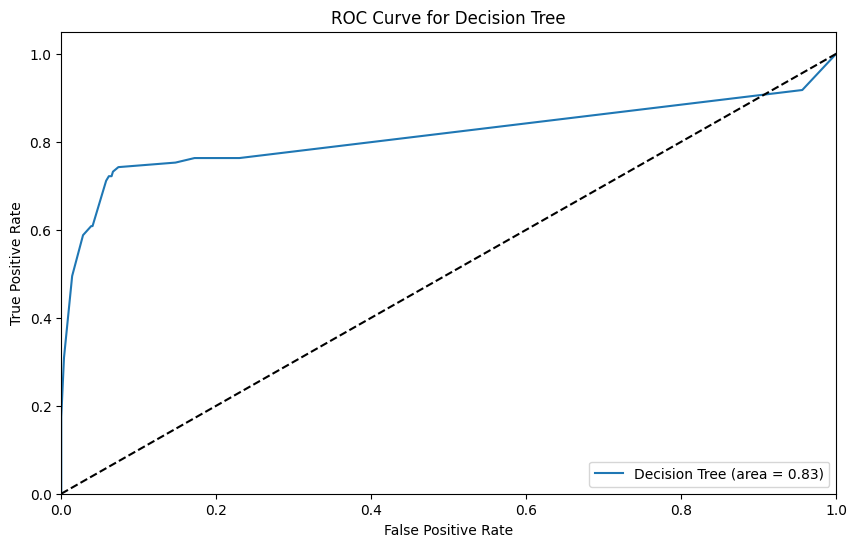

In [51]:
# Plot ROC curve for Decision Tree
fpr_dec_tree, tpr_dec_tree, thresholds_dec_tree = roc_curve(y_test, best_dec_tree.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(fpr_dec_tree, tpr_dec_tree, label='Decision Tree (area = {:.2f})'.format(roc_auc_score(y_test, y_pred_dec_tree)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.show()

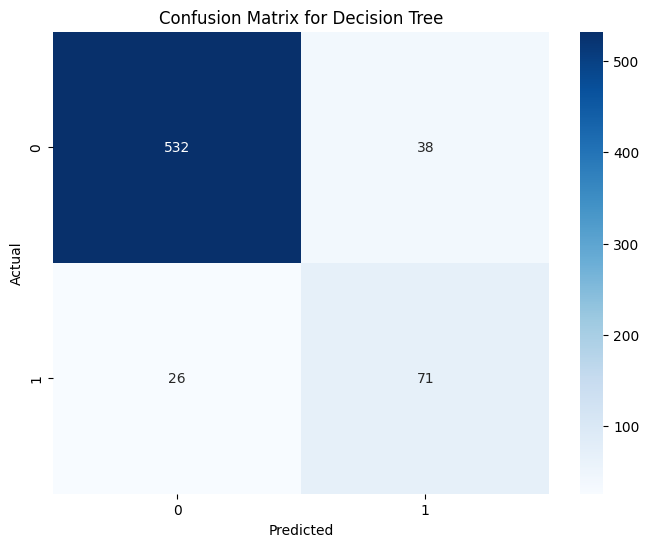

In [ ]:
# Decision Tree Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dec_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Summary of Decision Tree Prediction

The **Decision Tree** classifier, evaluated for predicting customer churn at SyriaTel, demonstrates strong performance with viable insights for reducing revenue loss.

#### Model Performance
- **Accuracy: 90.40%**: Correctly predicts 90.40% of cases (603/667).
  
- **Recall: 73.19%**: Identifies 73.19% of actual churners (71/97), ensuring most at-risk customers are flagged for retention.
  
- **Precision: 65.14%**: 65.14% of predicted churners are actual churners (71/109), reducing wasted retention efforts compared to Logistic Regression (34.63% precision).
  
- **F1-Score: 68.93%**: Balances precision and recall.
  
- **ROC-AUC: 83.26%**: Strong ability to distinguish churners from non-churners, reliable for ranking at-risk customers.
  
- **Confusion Matrix**:
  - **True Positives (TP): 71**: Correctly predicted 71 churners.
  - **True Negatives (TN): 532**: Correctly predicted 532 non-churners.
  - **False Positives (FP): 38**: 38 non-churners incorrectly flagged, leading to some unnecessary retention costs.
  - **False Negatives (FN): 26**: 26 churners missed, representing 26.81% of actual churners and potential revenue loss.



#### Business Implications
- **Strengths**:
  - Captures 73.19% of churners, enabling proactive retention for 71 customers.
  - Reduces false positives (38) compared to Logistic Regression (134), optimizing resource allocation.
  - Strong ROC-AUC (83.26%) supports reliable churn risk ranking.
- **Weaknesses**:
  - Misses 26 churners (26.81%), leading to some revenue loss.
  - Precision (65.14%) means 34.86% of predicted churners (38) are non-churners, incurring unnecessary costs.

#### Comparison with Logistic Regression
Compared to the Logistic Regression model:
- **Higher Precision**: 65.14% vs. 34.63%, reducing false positives, 38 vs. 134.
- **Same Recall**: 73.19% for both, catching the same number of churners (71).
- **Higher Accuracy**: 90.40% vs. 76.01%, due by better non-churner predictions.
- **Recommendation**: The Decision Tree is preferred for deployment due to its efficiency and balanced performance.

#### Recommendations for SyriaTel
1. **Deploy the Decision Tree**: Integrate into the CRM system to flag 109 predicted churners (71 TP + 38 FP) for targeted interventions.
2. **Target Key Predictors**:
   - Offer personalized support for customers with high **customer service calls**.
   - Provide discounted plans for high **total day minutes** users.
   - Review **international plan** features to address churn drivers.
   - Promote **voice mail plans** to enhance engagement.
3. **Minimize False Negatives**: Analyze the 26 missed churners to improve recall, possibly by adjusting the classification threshold.
4. **Optimize Costs**: Prioritize high-probability churners to reduce the impact of 38 false positives.


#### Conclusion
- The Decision Tree is an effective tool for SyriaTel, identifying most churners (73.19% recall) with improved precision (65.14%) compared to Logistic Regression. 
- By targeting the 109 predicted churners and addressing key predictors, SyriaTel can reduce churn-related revenue loss while optimizing retention efforts. Further refinements could enhance recall and precision for even greater impact.